In [1]:
import pandas as pd

In [6]:
df = pd.read_csv(r'C:\Users\hp\Desktop\sem6\PL\lab4\lab task dataset spam,ham.csv', encoding='latin1')

In [7]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


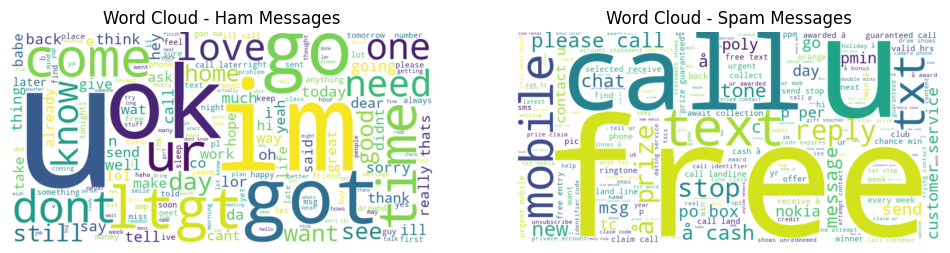

In [33]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all messages for each category (ham and spam)
ham_messages = ' '.join(df[df['v1'] == 'ham']['v2'])
spam_messages = ' '.join(df[df['v1'] == 'spam']['v2'])

# Generate word clouds for ham and spam messages
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_messages)
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_messages)

# Plot the word clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud - Ham Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud - Spam Messages')
plt.axis('off')

plt.show()


In [8]:
df = df[['v1', 'v2']]

In [9]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
punctuation_set = set(string.punctuation)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)
    text = ''.join(char for char in text if char not in punctuation_set)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    cleaned_text = ' '.join(tokens)
    
    return cleaned_text

df['v2'] = df['v2'].apply(clean_text)

df.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,v1,v2
0,ham,go jurong point crazy available bugis n great ...
1,ham,ok lar joking wif u oni
2,spam,free entry wkly comp win fa cup final tkts st ...
3,ham,u dun say early hor u c already say
4,ham,nah dont think goes usf lives around though


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['v2'])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['v1'], test_size=0.2, random_state=42)

In [13]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Example with Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train, y_train)
predictions_nb = model_nb.predict(X_test)

# Example with Support Vector Machine
model_svm = SVC()
model_svm.fit(X_train, y_train)
predictions_svm = model_svm.predict(X_test)

# Example with Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score, classification_report

print("Naive Bayes Accuracy:", accuracy_score(y_test, predictions_nb))
print("SVM Accuracy:", accuracy_score(y_test, predictions_svm))
print("Random Forest Accuracy:", accuracy_score(y_test, predictions_rf))

print("Naive Bayes Classification Report:\n", classification_report(y_test, predictions_nb))

Naive Bayes Accuracy: 0.967713004484305
SVM Accuracy: 0.9721973094170404
Random Forest Accuracy: 0.9721973094170404
Naive Bayes Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



In [15]:
# Example with Support Vector Machine
print("Support Vector Machine Accuracy:", accuracy_score(y_test, predictions_svm))
print("Support Vector Machine Classification Report:\n", classification_report(y_test, predictions_svm))

Support Vector Machine Accuracy: 0.9721973094170404
Support Vector Machine Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       0.98      0.81      0.89       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.94      1115
weighted avg       0.97      0.97      0.97      1115



In [16]:
# Example with Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, predictions_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, predictions_rf))

Random Forest Accuracy: 0.9721973094170404
Random Forest Classification Report:
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98       965
        spam       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [27]:
new_message = "Congratulations! You've won a free trip to Italy!"
cleaned_message = clean_text(new_message)
new_message_vectorized = vectorizer.transform([cleaned_message])
prediction = model_svm.predict(new_message_vectorized)
print("Predicted Class:", prediction[0])

Predicted Class: ham


In [32]:
from flask import Flask, render_template, request

app = Flask(__name__)

@app.route('/')
def index():
    return render_template(r'C:\Users\hp\Desktop\sem6\PL\lab4\index.html')

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        new_message = request.form['message']
        cleaned_message = clean_text(new_message)
        new_message_vectorized = vectorizer.transform([cleaned_message])
        prediction = model_svm.predict(new_message_vectorized)[0]
        return render_template(r'C:\Users\hp\Desktop\sem6\PL\lab4\result.html', message=new_message, prediction=prediction)

if __name__ == '__main__':
    app.run(debug=True, port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1